<a href="https://colab.research.google.com/github/VU-CSP/popgrowth_assignment-jiamei33/blob/main/Quant_Bio_Week_2__Jia_Mei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [4]:

if IN_COLAB and not os.path.exists("growth_fxns.py"):
    !wget "https://raw.githubusercontent.com/VU-CSP/quantbio-assignments/main/growth_fxns.py"
from growth_fxns import *

In [5]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [6]:
if IN_COLAB and not os.path.exists("MCF10A_trametinib.csv"):
    !wget "https://raw.githubusercontent.com/VU-CSP/quantbio-assignments/main/MCF10A_trametinib.csv"
d = pd.read_csv("MCF10A_trametinib.csv")
d.head()

,well,time,cell.count,uid,drug1,drug1.conc
0,A01,0.8,32,10ACh-28A_H03,trametinib,0.000004
1,A01,5.6,25,10ACh-28A_H03,trametinib,0.000004
2,A01,10.5,31,10ACh-28A_H03,trametinib,0.000004
3,A01,15.3,53,10ACh-28A_H03,trametinib,0.000004
4,A01,20.0,39,10ACh-28A_H03,trametinib,0.000004


In [7]:
#Assignment 1
#Copy and execute a chunk of code from the line assigning values to d["pd"]. Describe what you did and the output in the following markup block.

d.insert(2,"l2",np.empty_like(d["cell.count"]))
d.insert(3,"pd",np.empty_like(d["cell.count"]))
d["l2"] = np.round(np.log2(d["cell.count"]),3)
d["pd"] = flatten_matrix([np.round(d[d["well"]==w]["l2"] - d[d["well"]==w]["l2"].to_list()[0],3) for w in d["well"].unique()])

In [8]:
d.head()

,well,time,l2,pd,cell.count,uid,drug1,drug1.conc
0,A01,0.8,5.000,0.000,32,10ACh-28A_H03,trametinib,0.000004
1,A01,5.6,4.644,-0.356,25,10ACh-28A_H03,trametinib,0.000004
2,A01,10.5,4.954,-0.046,31,10ACh-28A_H03,trametinib,0.000004
3,A01,15.3,5.728,0.728,53,10ACh-28A_H03,trametinib,0.000004
4,A01,20.0,5.285,0.285,39,10ACh-28A_H03,trametinib,0.000004


We created a column in postion index 3 of the dataframe and named it "pd." This column that has the same shape and datatype as pd to the right. The purpose is to normalize the l2 data.


In the "pd" column, we used a loop to iterate over each unique "well" in the dataframe "d" to calculate the difference of the first element of l2 from each element in 12 starting at index 0. The final value is rounded to three decimal points. The output value will be appended to the new column we created "pd."

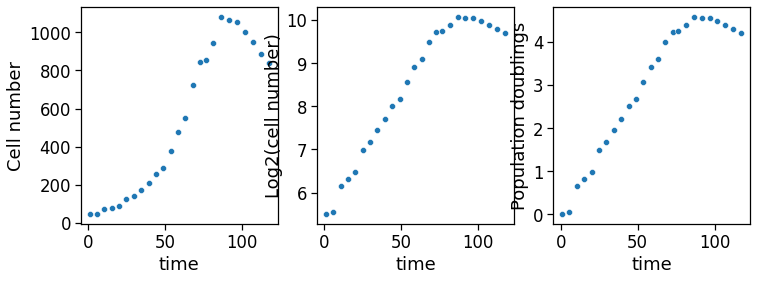

In [9]:
ss = d[d["well"]=="A05"]
# names = ['Linear', 'Log2', 'Normalized log2']
if IN_COLAB:
    fig, axs = plt.subplots(figsize=(12, 4))
else:
    fig, axs = plt.subplots(figsize=(12, 4), layout="constrained")
plt.subplot(131)
plt.ylabel('Cell number')
sns.scatterplot(data=ss, x="time", y="cell.count")
plt.subplot(132)
plt.ylabel('Log2(cell number)')
sns.scatterplot(data=ss, x="time", y="l2")
plt.subplot(133)
plt.ylabel('Population doublings')
sns.scatterplot(data=ss, x="time", y="pd")
plt.show()

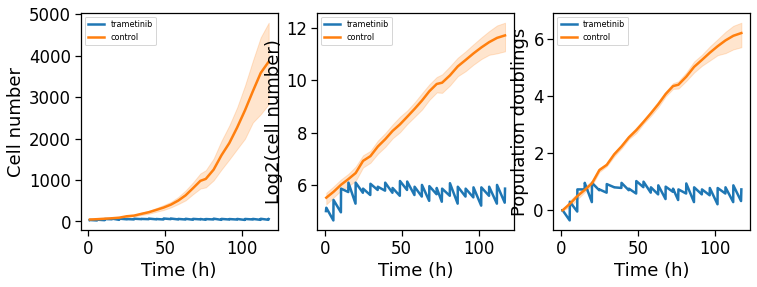

In [10]:
if IN_COLAB:
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
else:
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), layout="constrained")

plt.subplot(131)
plt.xlabel('Time (h)')
plt.ylabel('Cell number')
sns.lineplot(data=d, x="time", y="cell.count", hue="drug1")
plt.legend(loc='upper left', fontsize='8')
plt.subplot(132)
plt.xlabel('Time (h)')
plt.ylabel('Log2(cell number)')
sns.lineplot(data=d, x="time", y="l2", hue="drug1")
plt.legend(loc='upper left', fontsize='8')
plt.subplot(133)
plt.xlabel('Time (h)')
plt.ylabel('Population doublings')
sns.lineplot(data=d, x="time", y="pd", hue="drug1")
plt.legend(loc='upper left', fontsize='8')
plt.show()

In [11]:
n_tram = len(d[d["drug1"]=="trametinib"]["well"].unique())
n_ctrl = len(d[d["drug1"]!="trametinib"]["well"].unique())

print(f"Wells with trametinib treatment: n = {n_tram}\nControl wells: n = {n_ctrl}")

Wells with trametinib treatment: n = 2
Control wells: n = 10


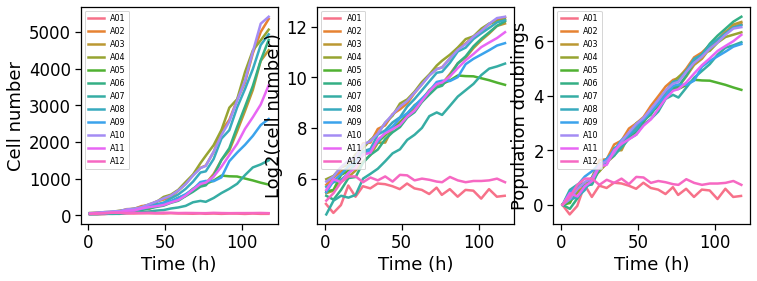

In [12]:
if IN_COLAB:
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
else:
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), layout="constrained")
plt.subplot(131)
plt.xlabel('Time (h)')
plt.ylabel('Cell number')
sns.lineplot(data=d, x="time", y="cell.count", hue="well")
plt.legend(loc='upper left', fontsize='8')
plt.subplot(132)
plt.xlabel('Time (h)')
plt.ylabel('Log2(cell number)')
sns.lineplot(data=d, x="time", y="l2", hue="well")
plt.legend(loc='upper left', fontsize='8')
plt.subplot(133)
plt.xlabel('Time (h)')
plt.ylabel('Population doublings')
sns.lineplot(data=d, x="time", y="pd", hue="well")
plt.legend(loc='upper left', fontsize='8')
plt.show()

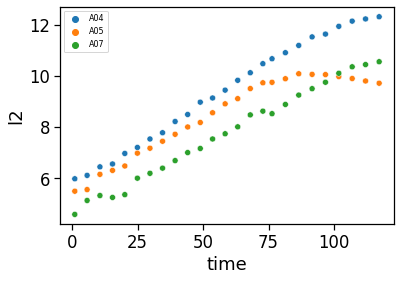

In [13]:
#Assignment 2 
#Add your code for scatterplot of population doublings here
#Generate a scatterplot of population doublings over time for the same wells as the block above (wells A04, A05 and A07). Describe the difference you see between the new graph and the graph of data in log2 scale.

# dtp = data to plot
dtp = d[(d["well"] == "A04") | (d["well"] == "A05") | (d["well"] == "A07")]
sns.scatterplot(data=dtp, x="time", y="l2", hue="well")
plt.legend(loc='upper left', fontsize='8')

#Add your code for scatterplot of population doublings here
#Describe your comparison of the data shown in log2 (l2) and normalized log2 (pd).
#Apart from visually inspecting the data, we should use model fitting to extract parameter values that can help us interpret the data quantitatively.

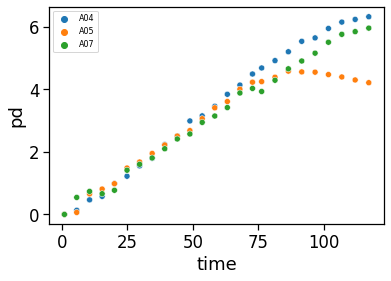

In [14]:
dtp = d[(d["well"] == "A04") | (d["well"] == "A05") | (d["well"] == "A07")]
sns.scatterplot(data=dtp, x="time", y="pd", hue="well")
plt.legend(loc='upper left', fontsize='8')

The difference between the scatter plot and the data in log2 scale is that the y-scale of log2 is larger (up to 12) than that of normalized log (pd) (up to 6). Furthermore, in the pd scatter plot, all three samples start off in closer proximity to each other. As the time nears 75-100, the samples A07 and A04 are visibly closer together than in the l2 plot. 

In [15]:
from scipy.stats import linregress

In [16]:
# dtf = data to fit
dtf = d[d["drug1.conc"]==0]
ctrl_wells = dtf["well"].unique()

In [17]:
res = [linregress(dtf[dtf["well"]==ctrl_wells[i]][["time","l2"]]) for i in np.arange(len(ctrl_wells))]

In [18]:
example_well = dtf["well"].unique()[1]
print(f"Example linregress output for well {example_well}")
res[1]

Example linregress output for well A03


LinregressResult(slope=0.060846424497371744, intercept=5.212788495165553, rvalue=0.9990947611147231, pvalue=4.776167619926461e-33, stderr=0.0005402101680293283, intercept_stderr=0.036687154857080205)

In [19]:
prates = pd.Series(data=[np.round(r.slope,4) for r in res], index=ctrl_wells)
prates

A02    0.0602
A03    0.0608
A04    0.0596
A05    0.0421
A06    0.0632
A07    0.0528
A08    0.0612
A09    0.0515
A10    0.0592
A11    0.0557
dtype: float64

In [20]:
r2_vals = pd.Series(data=[np.round(r.rvalue**2,4) for r in res], index=ctrl_wells)
r2_vals

A02    0.9940
A03    0.9982
A04    0.9916
A05    0.8989
A06    0.9976
A07    0.9948
A08    0.9951
A09    0.9906
A10    0.9963
A11    0.9961
dtype: float64

In [21]:
#Assignment 3
#Perform linear regression using the linregress function on the trametinib-treated wells. Describe how the proliferation rates compare to the rates of the control wells in the subsequent markdown block.

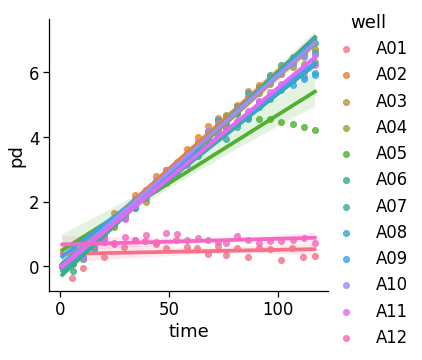

In [22]:
p = sns.lmplot(data=d, x="time", y="pd", hue="well")

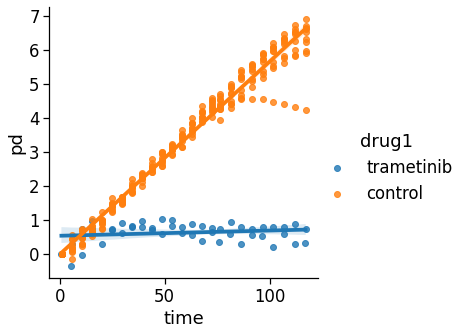

In [23]:
p = sns.lmplot(data=d, x="time", y="pd", hue="drug1")

The doubling rates in the trametinib-treated wells are almost nonchanging, with a slight increase in slope but still within the 0-1 pd range. Contrastingly, the doubling rates of the control were increasing at a faster rate to greater than 6 pd by 100=time.